## 필요한 라이브러리 임포트, 현재 디렉토리 파일 목록 출력

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path = os.getcwd() # 현재 디렉토리 선언
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\AIpj\backpropagation.ipynb
c:\AIpj\cnn copy.ipynb
c:\AIpj\data0.pickle
c:\AIpj\data1.pickle
c:\AIpj\data2.pickle
c:\AIpj\data3.pickle
c:\AIpj\data4.pickle
c:\AIpj\data5.pickle
c:\AIpj\data6.pickle
c:\AIpj\data7.pickle
c:\AIpj\data8.pickle
c:\AIpj\datasets_preparing.py
c:\AIpj\final.ipynb
c:\AIpj\grayscale.ipynb
c:\AIpj\histogram.ipynb
c:\AIpj\histogram_1.ipynb
c:\AIpj\htest.ipynb
c:\AIpj\input.py
c:\AIpj\labels.pickle
c:\AIpj\label_names.csv
c:\AIpj\mean_image_gray.pickle
c:\AIpj\mean_image_rgb.pickle
c:\AIpj\mnist.pkl
c:\AIpj\overfitting_small_data.png
c:\AIpj\pca_result.png
c:\AIpj\std_gray.pickle
c:\AIpj\std_rgb.pickle
c:\AIpj\t10k-images-idx3-ubyte.gz
c:\AIpj\t10k-labels-idx1-ubyte.gz
c:\AIpj\test.ipynb
c:\AIpj\test.pickle
c:\AIpj\test1.ipynb
c:\AIpj\test2.ipynb
c:\AIpj\train-images-idx3-ubyte.gz
c:\AIpj\train-labels-idx1-ubyte.gz
c:\AIpj\train.pickle
c:\AIpj\training_examples.png
c:\AIpj\two_layer_net.py
c:\AIpj\valid.pickle
c:\AIpj\common\functions.py
c:\AIpj\common\gradient.p

In [5]:
import csv
import pandas as pd

df = pd.read_csv('label_names.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


## data0.pickle 데이터셋 불러오기

In [7]:
#data0.pickle 파일 불러오기
data = pd.read_pickle(path + '\\data0.pickle')
print('keys: ', data.keys(), end="\n\n\n")


# y_train, y_validation 
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# x_train, x_valid, x_test transpose
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)
        

#train.pickle 파일 불러오기
tr = pd.read_pickle(path + '\\train.pickle')
print();print('keys:', tr.keys(), end="\n\n\n")

#labels, features
labels=tr['labels']
features=tr['features']
print('labels: ',labels.shape); print('features: ',features.shape)
print();print()

print('train개수:',len(train_labels))
print('valid개수:',len(valid_labels))
print('test개수:',len(test_labels))

keys:  dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])


x_test: (12630, 32, 32, 3)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
labels: 43
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)

keys: dict_keys(['coords', 'labels', 'features', 'sizes'])


labels:  (34799,)
features:  (34799, 32, 32, 3)




NameError: name 'train_labels' is not defined

## x_train 일부 이미지 출력

(16, 32, 32, 3)


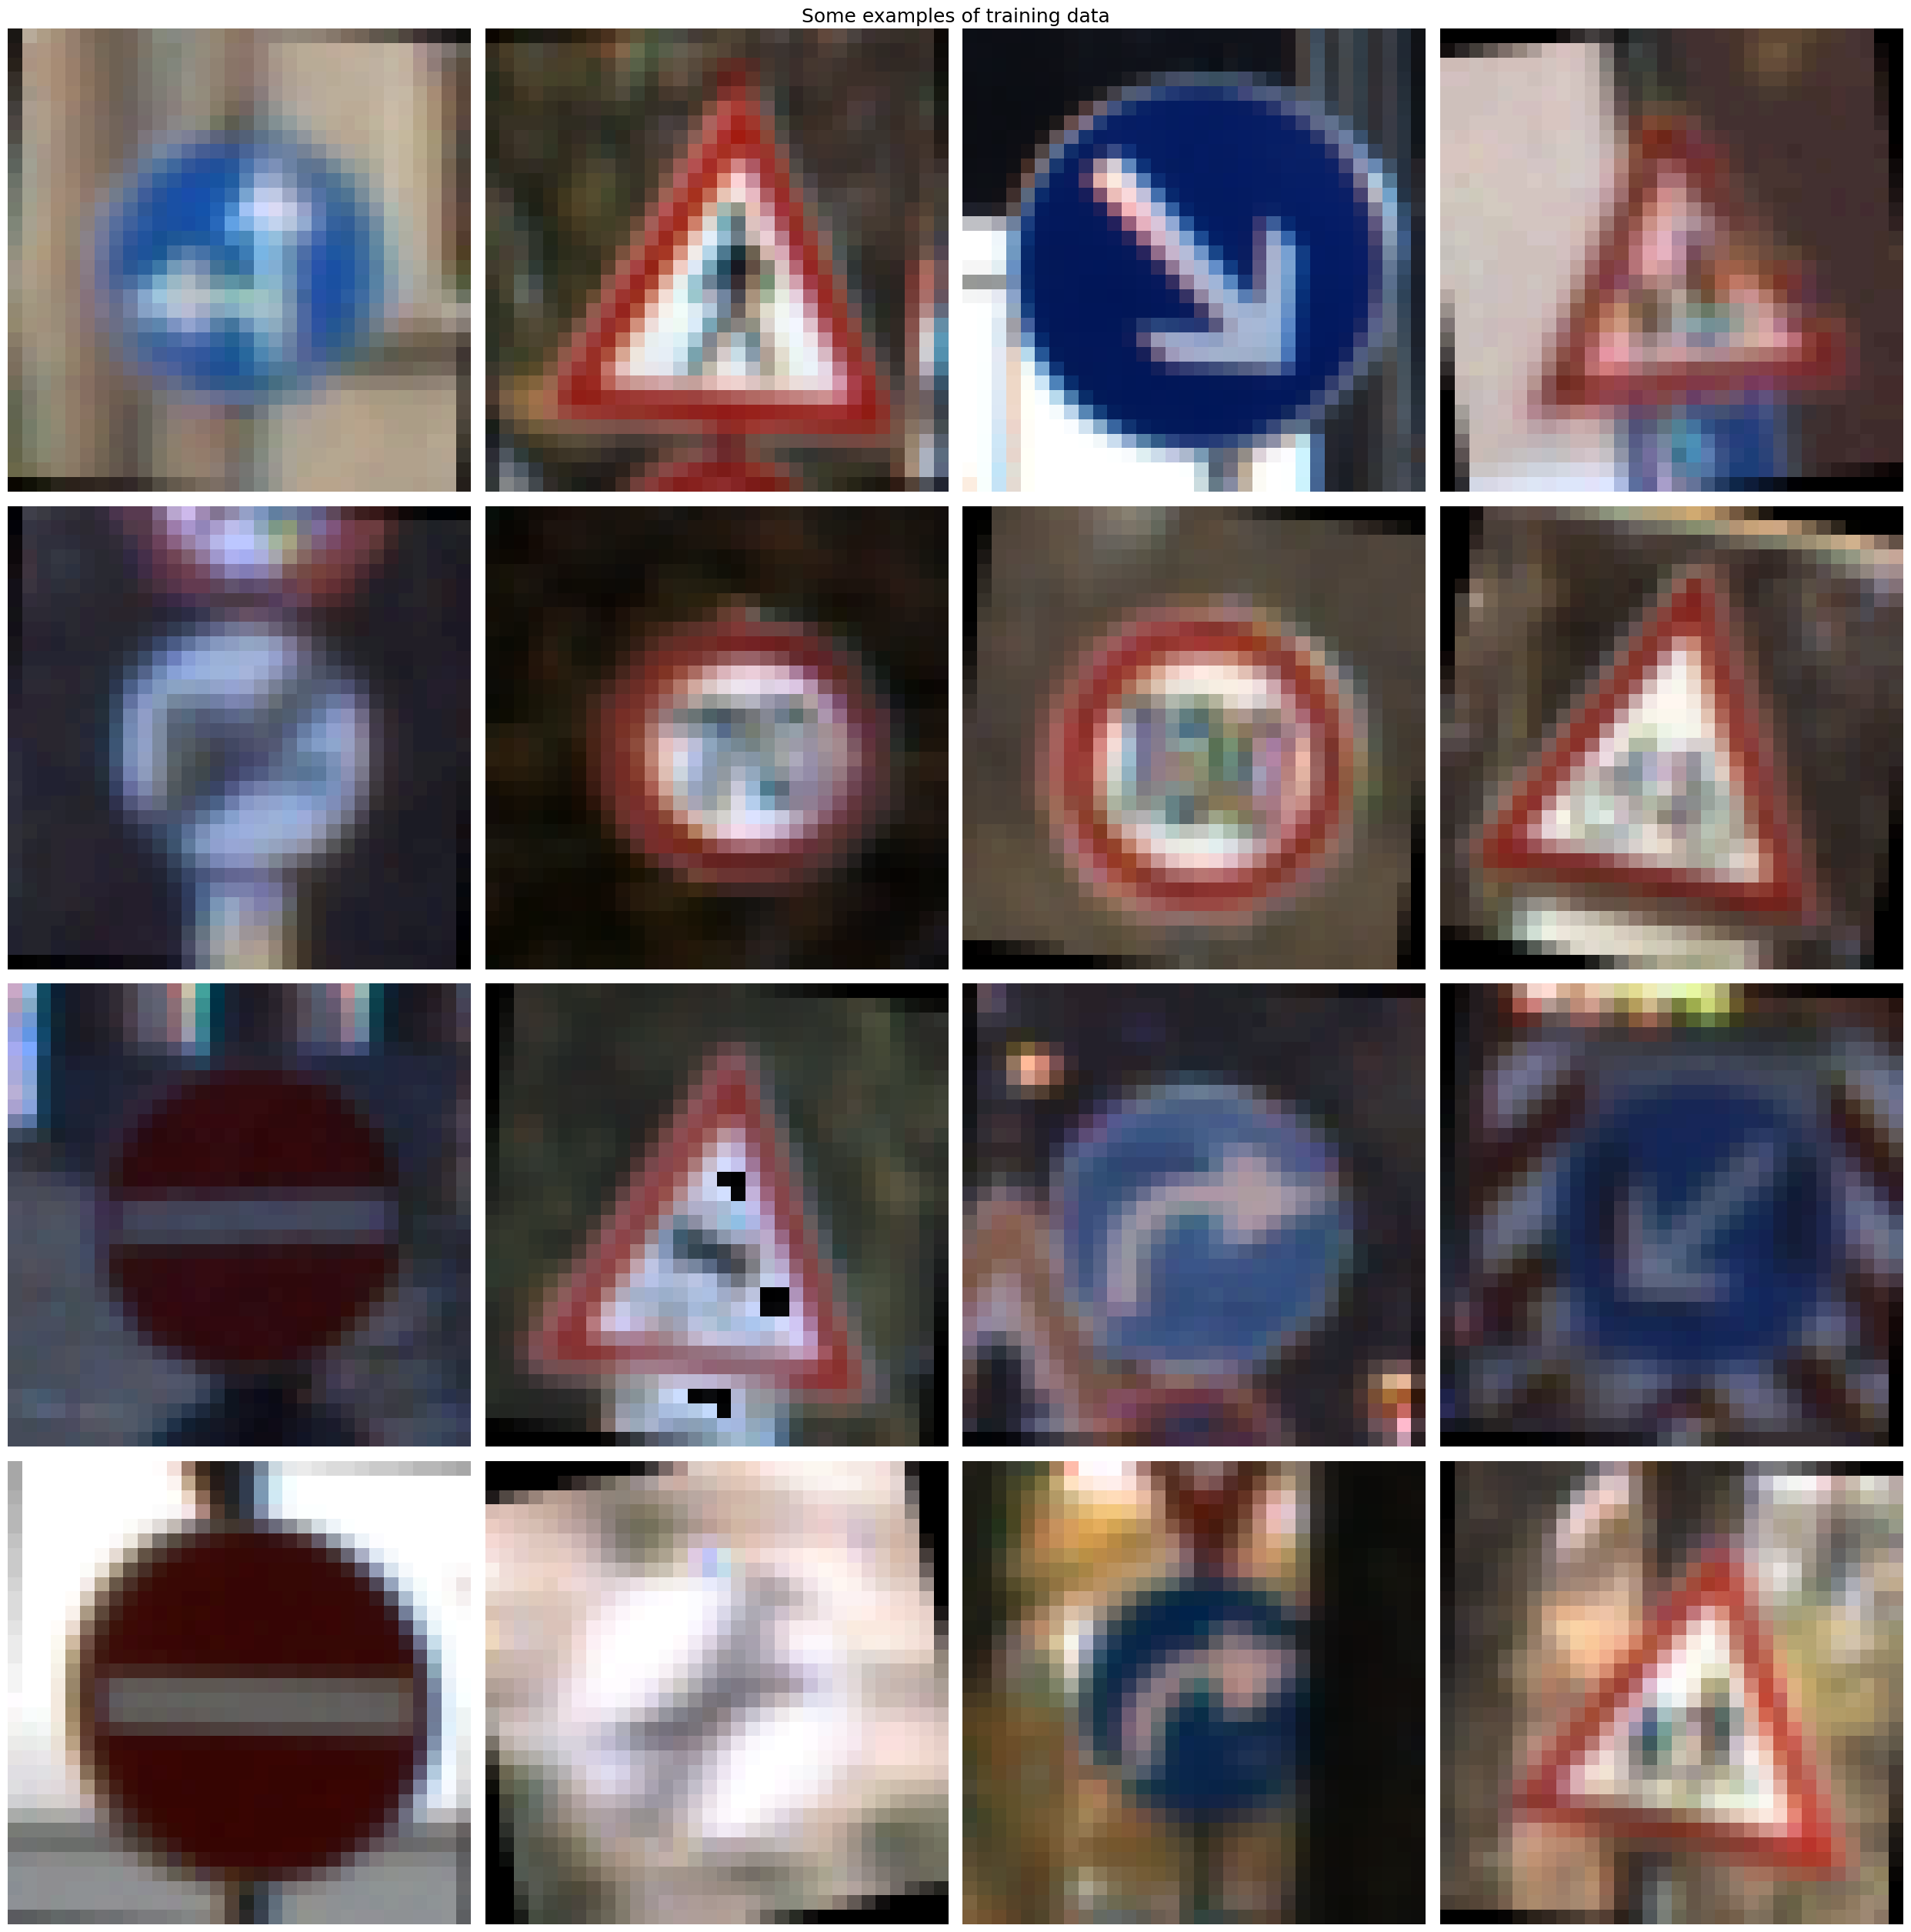

In [8]:
%matplotlib inline

def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid


# Visualizing some examples of training data
examples = data['x_train'][:16, :, :, :]
print(examples.shape)  

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(32,32)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()



### 다른 방법

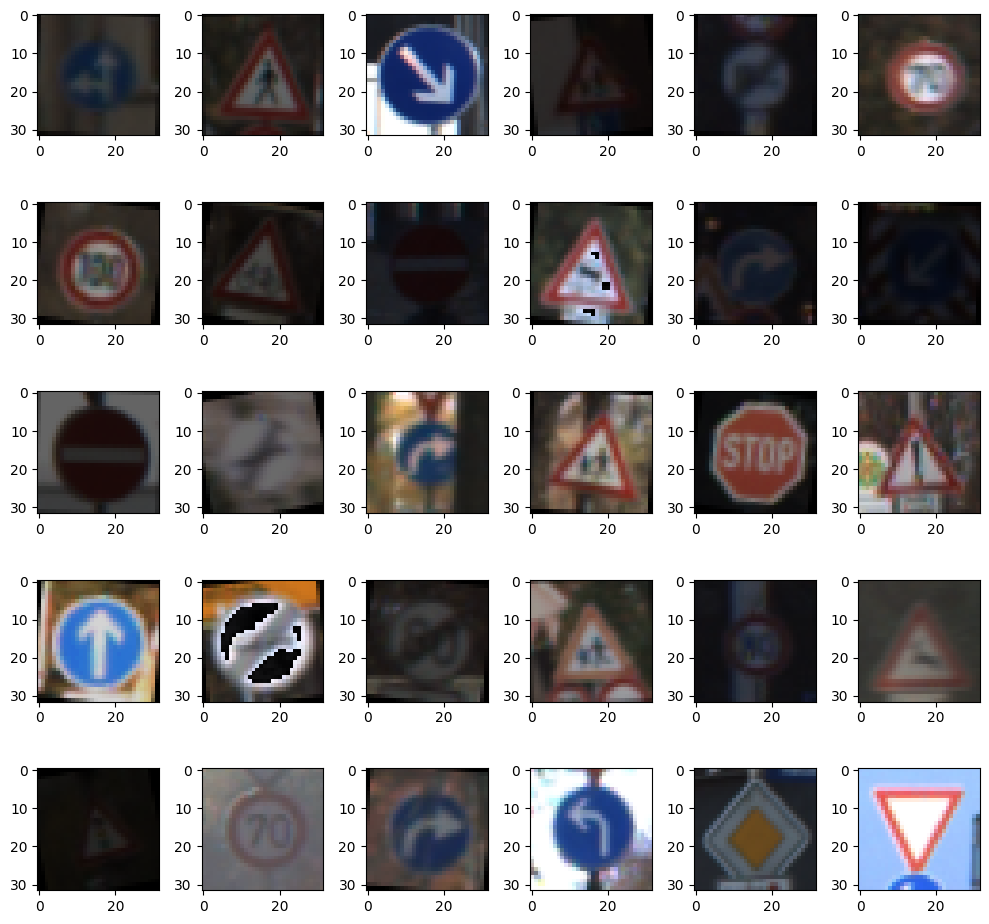

In [9]:
x_train = data['x_train']
plt.figure(figsize=(10,10)) # 그림 크기 10x10
for i in range(0,30): # 30장 출력
    plt.subplot(5,6,(i%30)+1)
    plt.imshow(x_train[i].astype(np.uint8))
    plt.tight_layout() # 각각 서브플롯 사이 간격 최적화

## 데이터 개수 히스토그램

train_labels 개수:  34799
valid_labels 개수:  4410
test_labels 개수:  12630

train_labels 평균:  15.738297077502228
train_labels 표준편차:  12.002396466891161
train_images 평균:  82.6775890369964
train_images 표준편차:  67.85088842633232

label별 개수:  Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})


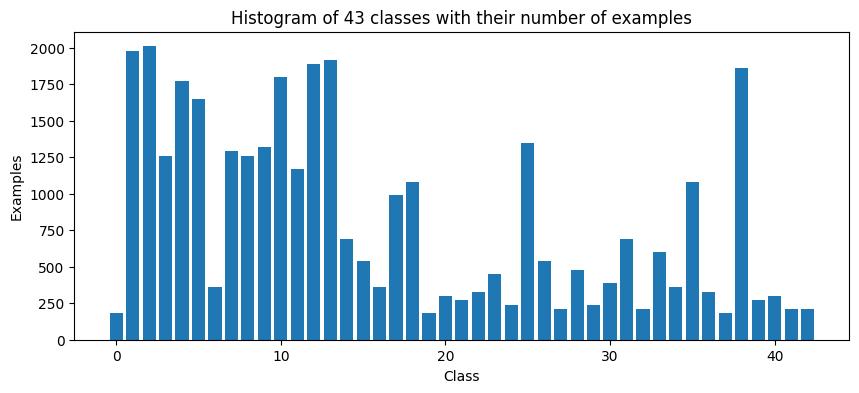

<Figure size 500x1000 with 0 Axes>

In [10]:
import cv2
from datasets_preparing import local_histogram_equalization

train_data = pd.read_pickle(path + '\\train.pickle')
valid_data = pd.read_pickle(path + '\\valid.pickle')
test_data = pd.read_pickle(path + '\\test.pickle')
labels_data = pd.read_pickle(path + '\\labels.pickle')

train_images = train_data['features']
train_labels = train_data['labels']

valid_images = valid_data['features']
valid_labels = valid_data['labels']

test_images = test_data['features']
test_labels = test_data['labels']

print('train_labels 개수: ',len(train_labels))
print('valid_labels 개수: ',len(valid_labels))
print('test_labels 개수: ',len(test_labels));print()

print('train_labels 평균: ',np.mean(train_labels))
print('train_labels 표준편차: ',np.std(train_labels))
print('train_images 평균: ',np.mean(train_images))
print('train_images 표준편차: ',np.std(train_images));print()

from collections import Counter 
# 리스트 안에 요소별로 개수를 확인하는 방법
train_labels # 이 리스트의
counted = Counter(train_labels) # 라벨별로 개수를 세어줌
print('label별 개수: ',counted) # 라벨별 개수 출력

# 그래프 크기 조절
plt.figure(figsize=(10, 4))

# 그래프 그리기
plt.bar(counted.keys(), counted.values())

# 그래프 레이블 추가
plt.xlabel('Class');plt.ylabel('Examples')
plt.title('Histogram of 43 classes with their number of examples')
plt.figure(figsize=(5, 10))

# 그래프 보여주기
plt.show()

## r채널의 label, pixel

In [11]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

x_train=x_train/255.0
x_test=x_test/255.0
n_train=y_train.shape[0]
n_test=y_test.shape[0]

train_r=pd.DataFrame({'label':train_labels})
train_r

print(len(train_r))
train_r.head()

pixel_n=0
for i in range(32):
    for j in range(32):
        pixel_n+=1
        train_r['pixel{}'.format(pixel_n)]=train_images[:,i,j,0]
        
train_r.head(len(train_r))

34799


C:\Users\kts_9\AppData\Local\Temp\ipykernel_1868\939734665.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_r['pixel{}'.format(pixel_n)]=train_images[:,i,j,0]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_1868\939734665.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_r['pixel{}'.format(pixel_n)]=train_images[:,i,j,0]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_1868\939734665.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,41,28,27,27,27,27,29,49,53,49,...,28,27,26,27,29,28,27,27,27,26
1,41,28,26,27,28,28,31,48,50,42,...,26,27,28,28,28,27,27,27,27,29
2,41,29,29,30,30,32,38,51,54,58,...,30,30,30,28,28,27,28,29,28,30
3,41,31,29,30,29,30,38,50,52,52,...,29,27,27,27,29,28,28,28,27,27
4,41,33,31,32,31,33,45,55,53,56,...,26,26,27,28,27,26,25,25,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34794,25,22,34,46,24,19,41,101,59,22,...,41,28,23,23,32,53,29,23,40,25
34795,25,22,32,35,39,24,29,33,35,28,...,30,31,29,46,28,28,31,27,32,44
34796,25,51,55,75,46,60,42,55,55,44,...,33,30,39,46,33,28,33,67,39,32
34797,25,82,120,112,65,65,98,85,65,104,...,46,38,55,49,34,30,44,32,45,41


In [12]:
train_r.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,...,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000
mean,15.738297,89.175551,89.278542,89.578580,89.914164,90.118222,90.343774,90.667663,91.002615,91.233570,...,79.076037,77.971062,76.537142,75.116555,73.709762,72.313256,70.827265,69.777637,69.284060,69.105233
std,12.002569,75.838958,75.652635,75.742438,75.714266,75.800900,75.905803,75.896794,75.766163,75.531696,...,67.461261,67.200489,66.881634,66.584657,66.064178,65.470351,64.609127,63.980990,63.720778,64.009979
min,0.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000
25%,5.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,32.000000,32.000000,32.000000,...,29.000000,29.000000,28.000000,27.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000
50%,12.000000,59.000000,59.000000,60.000000,60.000000,61.000000,60.000000,61.000000,61.000000,62.000000,...,54.000000,53.000000,51.000000,50.000000,49.000000,48.000000,46.000000,46.000000,45.000000,45.000000
75%,25.000000,128.000000,128.000000,129.000000,130.000000,130.000000,130.000000,131.000000,131.000000,131.000000,...,107.000000,104.000000,102.000000,100.000000,98.000000,94.000000,91.000000,90.000000,89.000000,89.000000
max,42.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


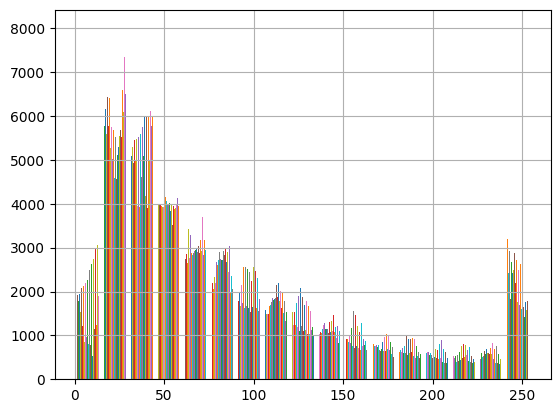

In [ ]:
np.arange(0,256,15)

bins_interval=np.arange(0,256,15)
plt.hist(train_r.iloc[:,1:],bins_interval)
plt.grid()

# plt.hist(train_g.iloc[:,1:],bins_interval)
# plt.grid()
# plt.hist(train_b.iloc[:,1:],bins_interval)
# plt.grid()

## 클래스별 RGB채널의 평균, 표준편차

클래스 0 RGB 평균 (정규화): [0.26043149 0.32453947 0.35605171]
클래스 0 RGB 표준 편차 (정규화): [0.24603584 0.2422538  0.23841798]
클래스 1 RGB 평균 (정규화): [0.39059034 0.3909618  0.39302743]
클래스 1 RGB 표준 편차 (정규화): [0.29140726 0.28923368 0.28515139]
클래스 2 RGB 평균 (정규화): [0.28636475 0.28653118 0.28986502]
클래스 2 RGB 표준 편차 (정규화): [0.24806671 0.24629225 0.24502829]
클래스 3 RGB 평균 (정규화): [0.24908838 0.26244982 0.26696265]
클래스 3 RGB 표준 편차 (정규화): [0.30801343 0.30721543 0.30520762]
클래스 4 RGB 평균 (정규화): [0.21402323 0.21573229 0.21725722]
클래스 4 RGB 표준 편차 (정규화): [0.20779056 0.20465065 0.2040141 ]
클래스 5 RGB 평균 (정규화): [0.20172197 0.20680709 0.20940611]
클래스 5 RGB 표준 편차 (정규화): [0.21969565 0.21953197 0.21936625]
클래스 6 RGB 평균 (정규화): [0.0709468  0.08513898 0.0908521 ]
클래스 6 RGB 표준 편차 (정규화): [0.09051078 0.09155197 0.09188392]
클래스 7 RGB 평균 (정규화): [0.17376276 0.18405843 0.18813173]
클래스 7 RGB 표준 편차 (정규화): [0.19299375 0.1926677  0.19116025]
클래스 8 RGB 평균 (정규화): [0.14251936 0.15046251 0.15479658]
클래스 8 RGB 표준 편차 (정규화): [0.17658839 0.1749

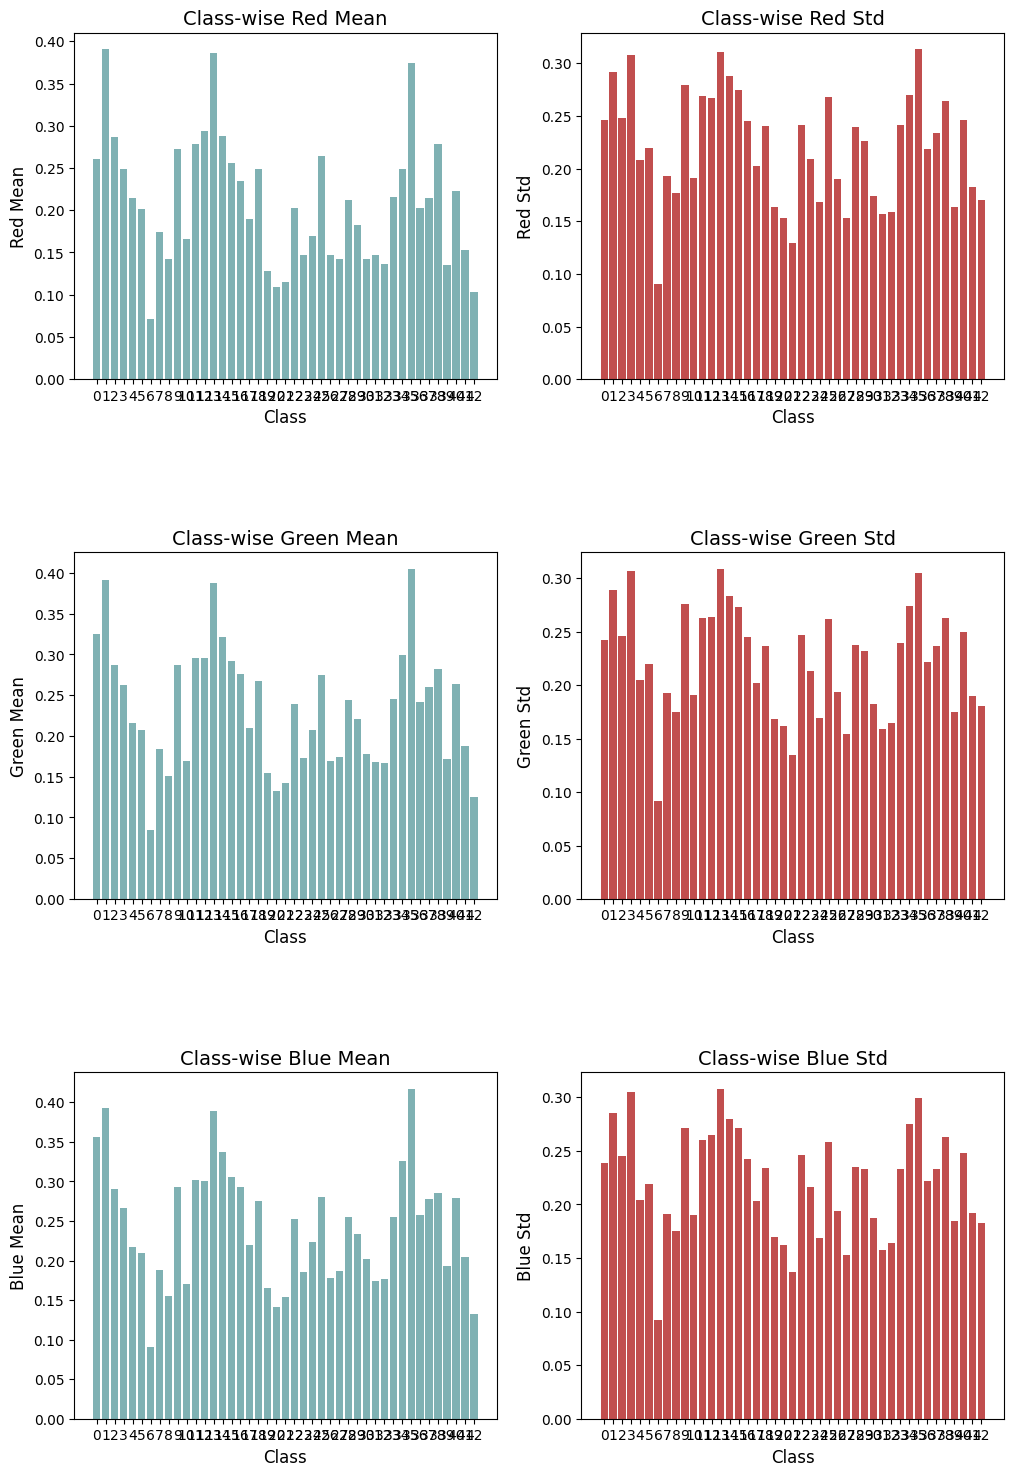

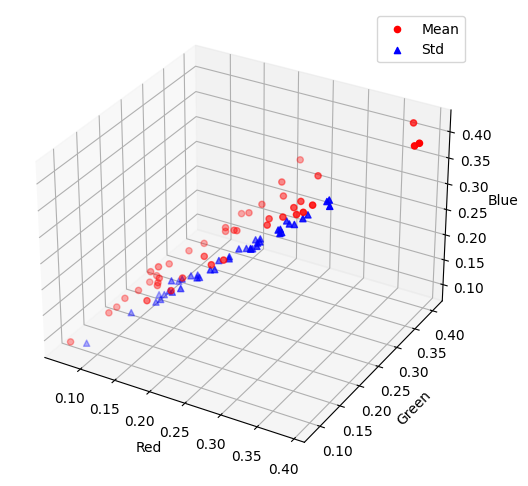

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 데이터 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스별 이미지 데이터의 RGB 평균과 표준 편차 계산
def calculate_class_rgb_mean_std(data):
    # 클래스별 데이터의 RGB 값을 flatten하여 계산을 수행
    data_flatten = data.reshape(-1, data.shape[3])
    # 데이터의 RGB 평균 계산
    mean = np.mean(data_flatten, axis=0)
    # 데이터의 RGB 표준 편차 계산
    std = np.std(data_flatten, axis=0)
    return mean, std

# 클래스별 RGB 평균과 표준 편차 계산
class_mean = []
class_std = []

for i in range(43):
    # 클래스 i의 이미지 데이터
    class_data = data['x_train'][np.where(data['y_train'] == i)]
    # 클래스 i의 RGB 평균과 표준 편차 계산
    mean, std = calculate_class_rgb_mean_std(class_data)
    # 클래스 i의 RGB 평균과 표준 편차 저장
    class_mean.append(mean[:3])
    class_std.append(std[:3])

# 정규화
class_mean = np.array(class_mean) / 255.
class_std = np.array(class_std) / 255.

# 결과 출력
for i in range(43):
    print(f"클래스 {i} RGB 평균 (정규화):", class_mean[i])
    print(f"클래스 {i} RGB 표준 편차 (정규화):", class_std[i])

# 그래프 그리기
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    # mean 그래프
    axs[i][0].bar(range(43), class_mean[:, i], align='center', alpha=0.8, color='#5f9ea0')
    axs[i][0].set_xlabel('Class', fontsize=12)
    axs[i][0].set_ylabel(f'{color} Mean', fontsize=12)
    axs[i][0].set_title(f'Class-wise {color} Mean', fontsize=14)
    axs[i][0].set_xticks(range(43))
    axs[i][0].tick_params(axis='both', labelsize=10)
    
    # std 그래프
    axs[i][1].bar(range(43), class_std[:, i], align='center', alpha=0.8, color='#b22222')
    axs[i][1].set_xlabel('Class', fontsize=12)
    axs[i][1].set_ylabel(f'{color} Std', fontsize=12)
    axs[i][1].set_title(f'Class-wise {color} Std', fontsize=14)
    axs[i][1].set_xticks(range(43))
    axs[i][1].tick_params(axis='both', labelsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()
from mpl_toolkits.mplot3d import Axes3D

# 3D 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 클래스별 RGB 평균 값을 3D 그래프로 표현
ax.scatter(class_mean[:, 0], class_mean[:, 1], class_mean[:, 2], c='r', marker='o', label='Mean')

# 클래스별 RGB 표준 편차 값을 3D 그래프로 표현
ax.scatter(class_std[:, 0], class_std[:, 1], class_std[:, 2], c='b', marker='^', label='Std')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()

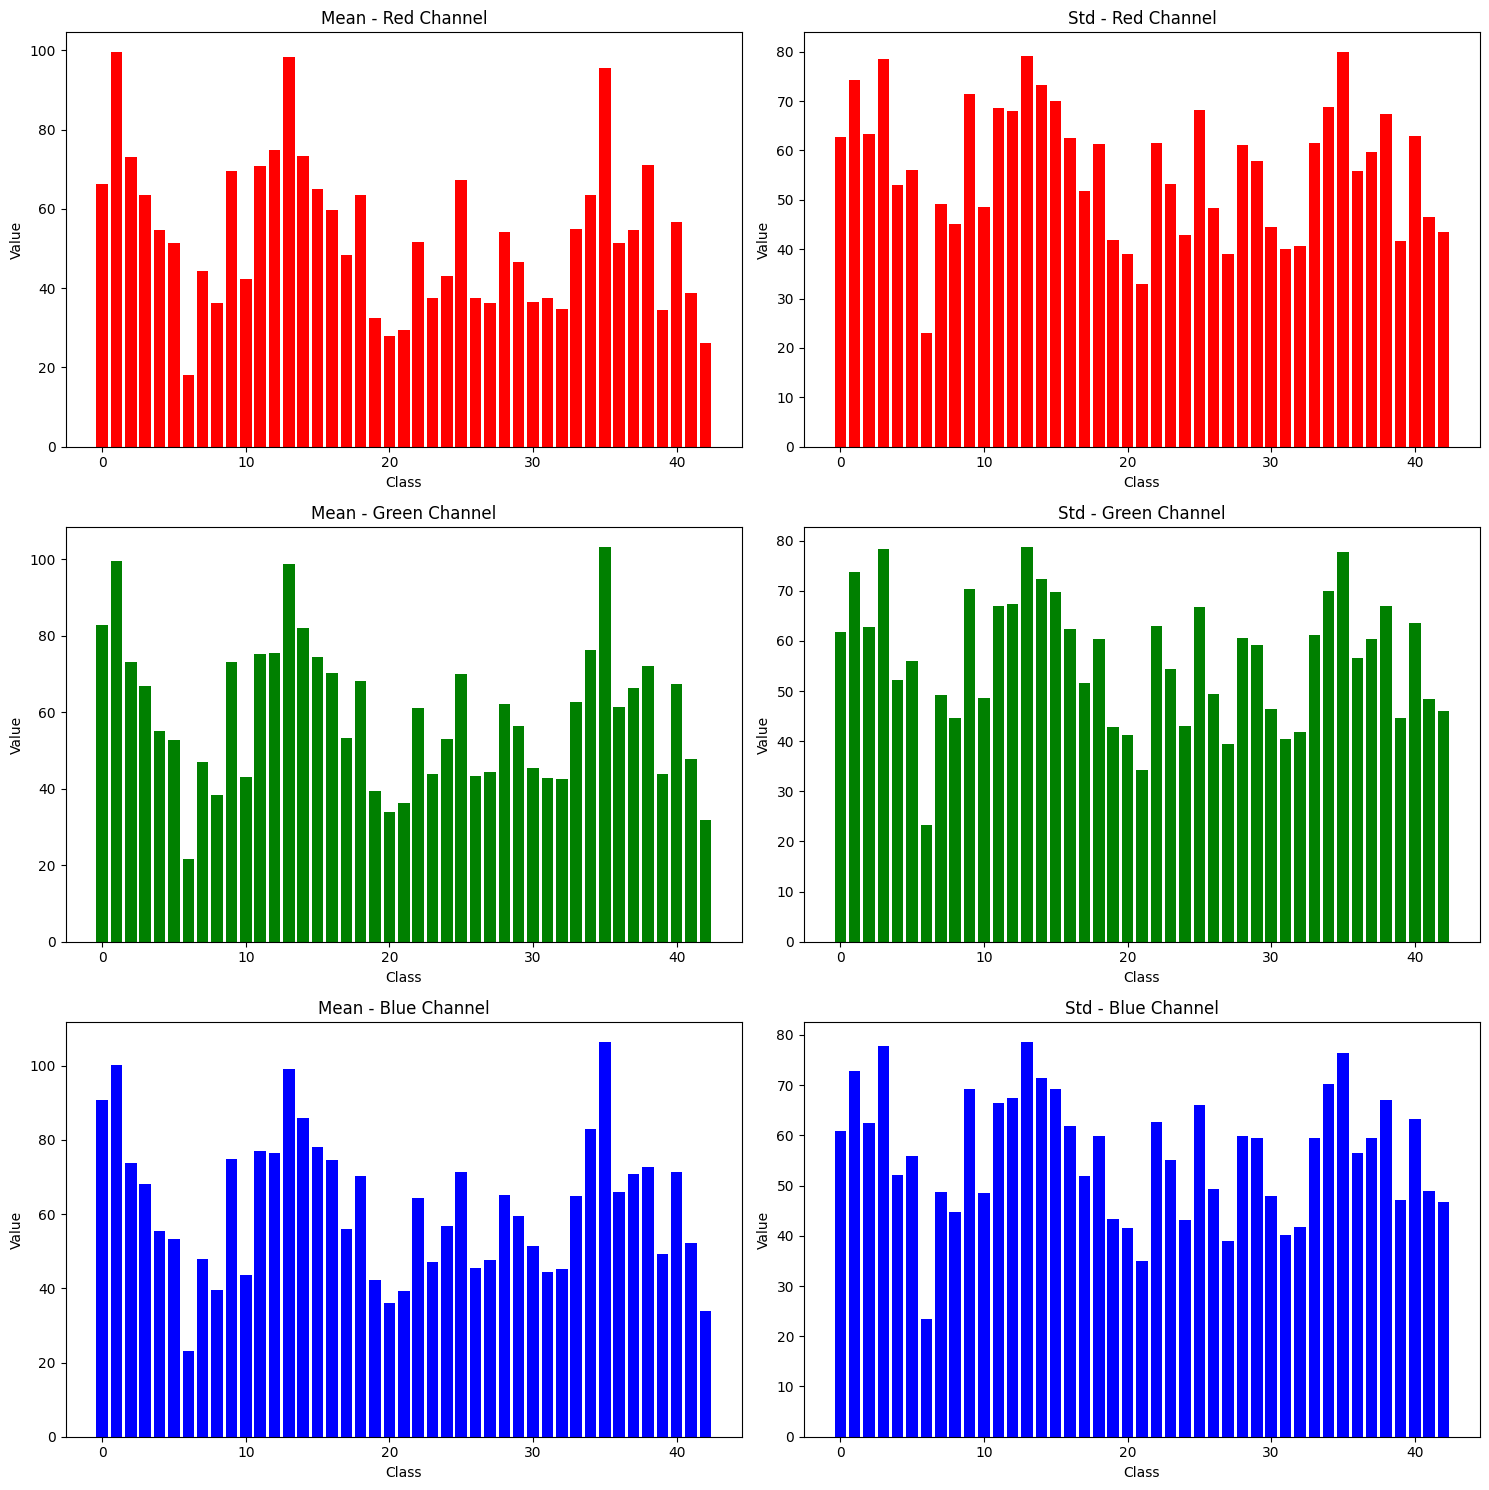

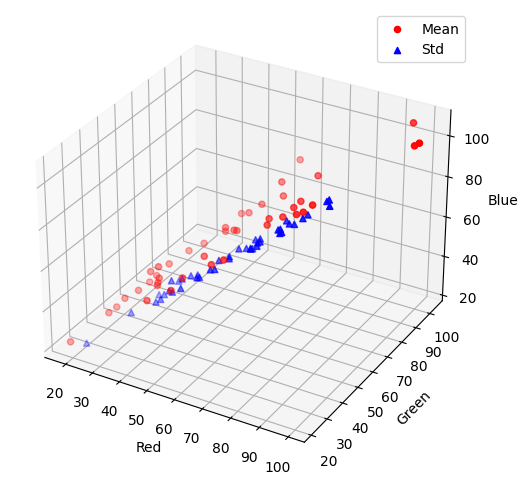

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 데이터 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스별 이미지 데이터의 RGB 평균과 표준 편차 계산
def calculate_class_rgb_mean_std(data):
    # 클래스별 데이터의 RGB 값을 flatten하여 계산을 수행
    data_flatten = data.reshape(-1, data.shape[3])
    # 데이터의 RGB 평균 계산
    mean = np.mean(data_flatten, axis=0)
    # 데이터의 RGB 표준 편차 계산
    std = np.std(data_flatten, axis=0)
    return mean, std

# 클래스별 RGB 평균과 표준 편차 계산
class_mean = []
class_std = []

for i in range(43):
    # 클래스 i의 이미지 데이터
    class_data = data['x_train'][np.where(data['y_train'] == i)]
    # 클래스 i의 RGB 평균과 표준 편차 계산
    mean, std = calculate_class_rgb_mean_std(class_data)
    # 클래스 i의 RGB 평균과 표준 편차 저장
    class_mean.append(mean[:3])
    class_std.append(std[:3])

class_mean = np.array(class_mean)
class_std = np.array(class_std)

# 클래스별 R, G, B 채널별로 바 형태의 그래프 그리기
colors = ['r', 'g', 'b']
channels = ['Red', 'Green', 'Blue']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i in range(3):
    for j in range(2):
        ax = axes[i, j]
        if j == 0:
            values = class_mean[:, i]
            title = f"Mean - {channels[i]} Channel"
        else:
            values = class_std[:, i]
            title = f"Std - {channels[i]} Channel"
        ax.bar(range(43), values, color=colors[i])
        ax.set_xlabel('Class')
        ax.set_ylabel('Value')
        ax.set_title(title)

plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# 3D 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 클래스별 RGB 평균 값을 3D 그래프로 표현
ax.scatter(class_mean[:, 0], class_mean[:, 1], class_mean[:, 2], c='r', marker='o', label='Mean')

# 클래스별 RGB 표준 편차 값을 3D 그래프로 표현
ax.scatter(class_std[:, 0], class_std[:, 1], class_std[:, 2], c='b', marker='^', label='Std')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()

## PCA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


data = pd.read_pickle(path + '\\data0.pickle')
sign=pd.DataFrame.from_dict(data,orient='index')
sign.loc[['x_train','x_test','y_train','y_test'],:]

x_train =  x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(np.shape(x_train))
print(np.shape(y_train))
y_train = data['y_train']
y_test = data['y_test']

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=3072)
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_

plt.bar(range(3072), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(3072), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)


plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_
# pca.explained_variance_ratio_.sum()

c:\Users\kts_9\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


(86989, 3072)
(86989, 43)


Eigenvalues: 
[1.57901104e+03 3.66070117e+02 1.15380521e+02 ... 2.79960666e-04
 2.62195936e-04 2.61870361e-04]


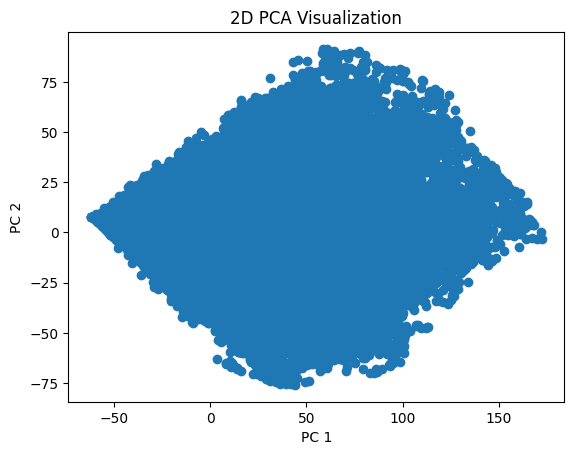

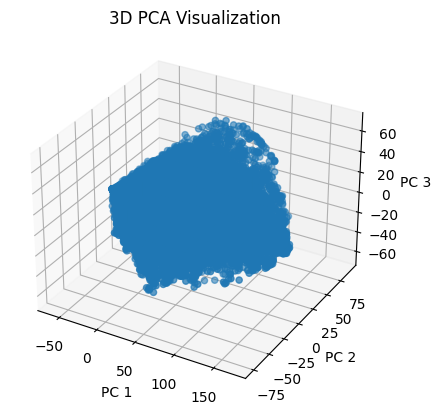

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # import Axes3D for 3D visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from pickle file
data = pd.read_pickle(path + '\\data0.pickle')

# Reshape input data to 2D arrays
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1)
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1)
y_train = data['y_train']
y_test = data['y_test']

# Standardize input data using StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Compute covariance matrix and its eigenvalues and eigenvectors
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Compute explained variance and cumulative explained variance
total_var = sum(eigen_vals)
var_exp = [(i / total_var) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Print eigenvalues and variance explained
print('Eigenvalues: \n%s' % eigen_vals)
# print('Explained variance: \n%s' % var_exp)
# print('Cumulative explained variance: \n%s' % cum_var_exp)

# Perform PCA with 2 components
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

# Plot 2D scatter plot of first two principal components
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D PCA Visualization')
plt.show()

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
x_train_pca_3d = pca_3d.fit_transform(x_train_std)

# Plot 3D scatter plot of first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_pca_3d[:, 0], x_train_pca_3d[:, 1], x_train_pca_3d[:, 2])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA Visualization')
plt.show()


## MLP

In [ ]:
import numpy as np
import pandas as pd
import pickle
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils.class_weight import compute_class_weight
from keras.utils.np_utils import to_categorical
import pdb

path = os.getcwd() # 현재 디렉토리 선언
data = pd.read_pickle(path + '\\data0.pickle')

x_train = data['x_train'] / 255.0
x_test = data['x_test'] / 255.0
t_train = data['y_train']
t_test = data['y_test']


# 히든노드 크기
network = TwoLayerNet(input_size=3072, hidden_size=500, output_size=43)

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 500
learning_rate = 0.08

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_num = [] # 추가된 부분

# 1에폭 당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

# 데이터 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(t_train), y=t_train)
data_weights = class_weights[t_train]

for i in range(iters_num):
    # 데이터 랜덤 셔플
    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    t_train_shuffled = t_train[indices]
    data_weights_shuffled = data_weights[indices]

    # 미니배치 샘플 인덱스 생성
    num_batches = len(x_train) // batch_size
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        x_batch = x_train_shuffled[start_idx:end_idx]
        t_batch = t_train_shuffled[start_idx:end_idx]
        data_weights_batch = data_weights_shuffled[start_idx:end_idx]
    
        # 기울기 계산
        grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
        
        # 가중치 반영
        class_batch = t_batch  # 클래스 레이블
        class_learning_rate = np.array([class_weights[c] for c in class_batch])  # 클래스별 러닝 레이트
        grad['W2'] *= np.expand_dims(data_weights_batch * class_learning_rate, axis=1)
        
        # 매개변수 갱신
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]
        
    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % 100 == 0:
        # 1에폭 당 정확도 계산
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        iter_num.append(i)
        print('Epoch %3d | Loss %.4f | Train Acc %.4f | Test Acc %.4f' 
            % (i+1, loss, train_acc, test_acc))
        
import matplotlib.pyplot as plt
plt.plot(iter_num, train_acc_list, label="train")
plt.plot(iter_num, test_acc_list, label="test")
plt.legend()
plt.show()

Epoch 100 | Loss 0.1086 | Train Acc 0.9866 | Test Acc 0.8533
Epoch 200 | Loss 0.0448 | Train Acc 0.9955 | Test Acc 0.8558
Epoch 300 | Loss 0.0280 | Train Acc 0.9978 | Test Acc 0.8565
Epoch 400 | Loss 0.0280 | Train Acc 0.9988 | Test Acc 0.8541
Epoch 500 | Loss 0.0128 | Train Acc 0.9993 | Test Acc 0.8538
Epoch 600 | Loss 0.0106 | Train Acc 0.9995 | Test Acc 0.8538
Epoch 700 | Loss 0.0082 | Train Acc 0.9996 | Test Acc 0.8522
Epoch 800 | Loss 0.0077 | Train Acc 0.9997 | Test Acc 0.8530
Epoch 900 | Loss 0.0047 | Train Acc 0.9998 | Test Acc 0.8530
Epoch 1000 | Loss 0.0053 | Train Acc 0.9998 | Test Acc 0.8519
Epoch 1100 | Loss 0.0071 | Train Acc 0.9999 | Test Acc 0.8529


## CNN

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)
    
# 변수 이름 변경
data['X'] = data.pop('x_train')
x_train = data['X']
# x_train = np.transpose(x_train, (0, 2, 3, 1))
y_train = data['y_train']

# 데이터 크기 확인
print(x_train.shape)
print(y_train.shape)

# 클래스 개수 확인
num_classes = np.max(y_train) + 1
print("Number of classes:", num_classes)

# 데이터셋 분할
split_ratio = 0.7
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1-split_ratio, random_state=1)
print(x_train.shape)
print(x_test.shape)

x_train=x_train.reshape(60892,32,32,3)
x_test=x_test.reshape(26097,32,32,3)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

# print(y_train[0])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
hist=model.fit(x_train, 
               y_train, 
               epochs=10, 
               batch_size=32, 
               validation_data=(x_test, y_test),
                verbose=2)

# 모델 평가
res=model.evaluate(x_test,y_test,verbose=0)
print('정확률은',res[1]*100)

(86989, 3, 32, 32)
(86989,)
Number of classes: 43
(60892, 3, 32, 32)
(26097, 3, 32, 32)
Epoch 1/10
1903/1903 - 82s - loss: 1.5048 - accuracy: 0.5607 - val_loss: 0.6157 - val_accuracy: 0.8095 - 82s/epoch - 43ms/step
Epoch 2/10
1903/1903 - 95s - loss: 0.3644 - accuracy: 0.8898 - val_loss: 0.2913 - val_accuracy: 0.9124 - 95s/epoch - 50ms/step
Epoch 3/10
1903/1903 - 84s - loss: 0.1966 - accuracy: 0.9395 - val_loss: 0.2183 - val_accuracy: 0.9370 - 84s/epoch - 44ms/step
Epoch 4/10
1903/1903 - 89s - loss: 0.1289 - accuracy: 0.9603 - val_loss: 0.2059 - val_accuracy: 0.9479 - 89s/epoch - 47ms/step
Epoch 5/10
1903/1903 - 74s - loss: 0.0923 - accuracy: 0.9708 - val_loss: 0.1710 - val_accuracy: 0.9530 - 74s/epoch - 39ms/step
Epoch 6/10
1903/1903 - 84s - loss: 0.0746 - accuracy: 0.9764 - val_loss: 0.1844 - val_accuracy: 0.9523 - 84s/epoch - 44ms/step
Epoch 7/10
1903/1903 - 78s - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.1513 - val_accuracy: 0.9582 - 78s/epoch - 41ms/step
Epoch 8/10
1903/1903 - 

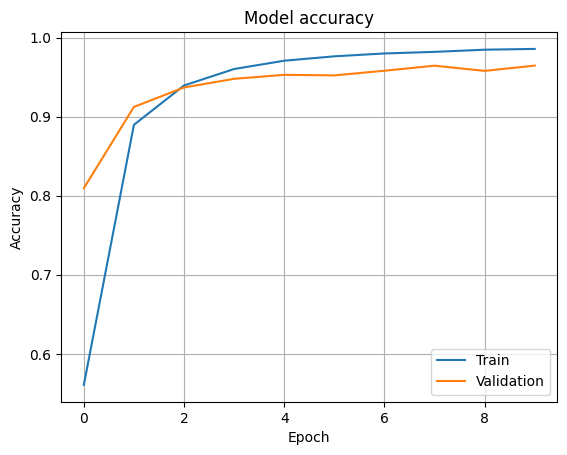

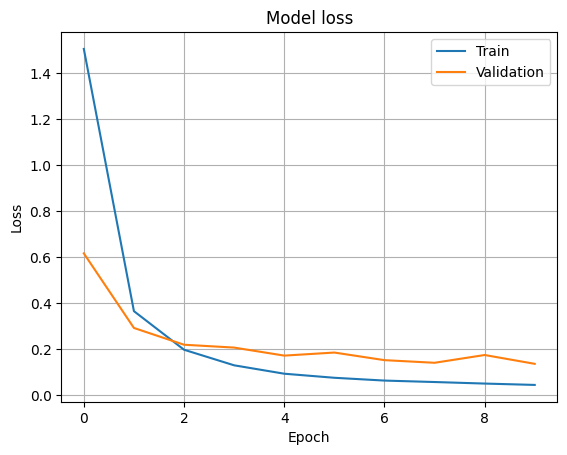

In [ ]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 커널의 시각화 

(86989, 32, 32, 3)
(86989,)
Number of classes: 43
(60892, 32, 32, 3)
(26097, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 64)          0         
                                

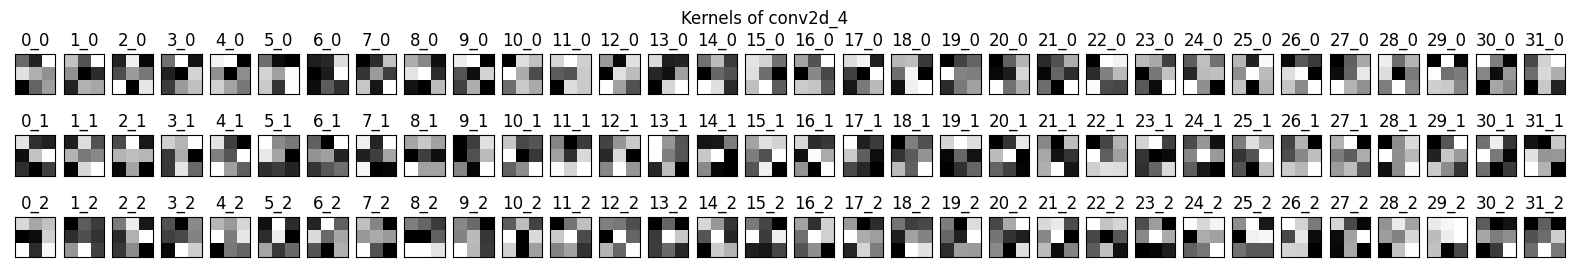

conv2d_8 (None, 30, 30, 32)
conv2d_9 (None, 13, 13, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
816/816 [==============================] - 19s 23ms/step


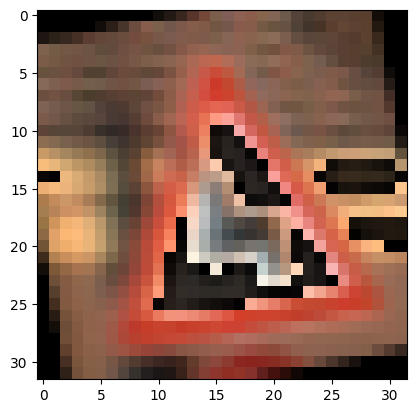

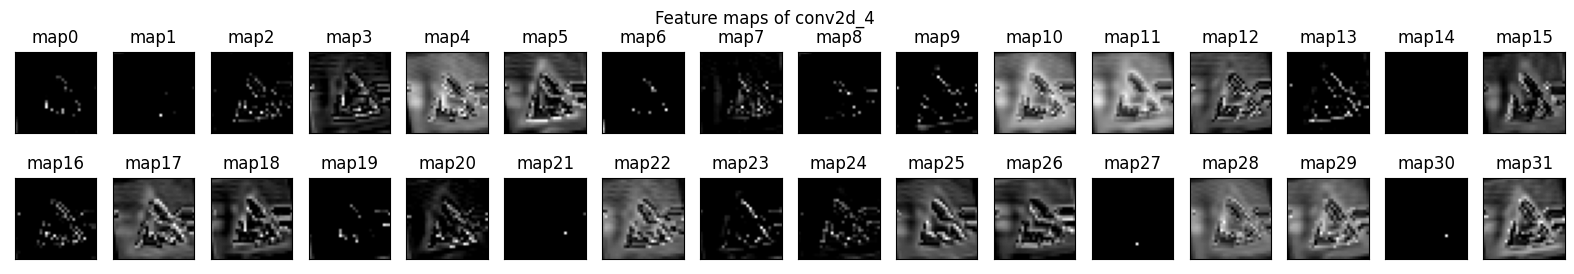

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)
    
# 변수 이름 변경
data['X'] = data.pop('x_train')
x_train = data['X']
x_train = np.transpose(x_train, (0, 2, 3, 1))
y_train = data['y_train']

# 데이터 크기 확인
print(x_train.shape)
print(y_train.shape)

# 클래스 개수 확인
num_classes = np.max(y_train) + 1
print("Number of classes:", num_classes)

# 데이터셋 분할
split_ratio = 0.7
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1-split_ratio, random_state=1)
print(x_train.shape)
print(x_test.shape)

x_train=x_train.reshape(60892,32,32,3)
x_test=x_test.reshape(26097,32,32,3)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

# print(y_train[0])

cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 모델 컴파일
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 평가
res=model.evaluate(x_test,y_test,verbose=0)

cnn.summary()


for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

# augmentation

(86989, 3, 32, 32)
(86989,)
(12630, 3, 32, 32)
(12630,)


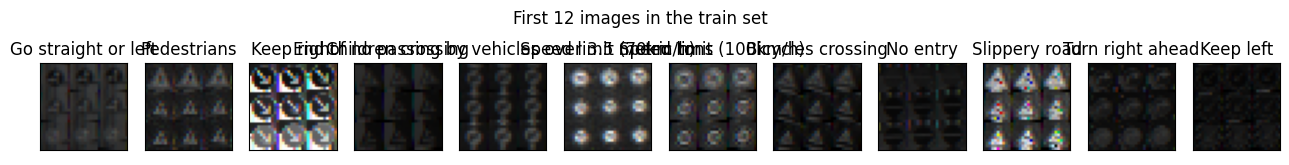

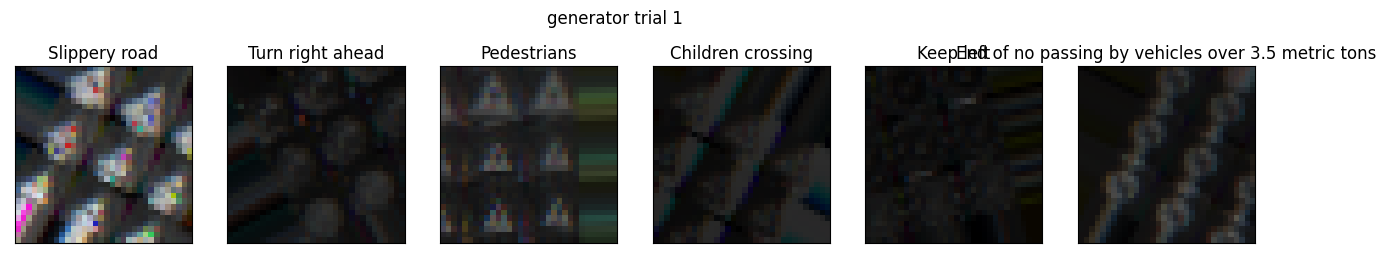

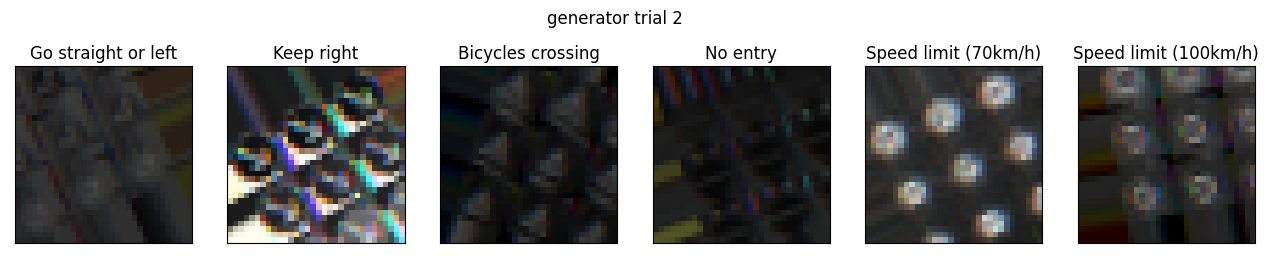

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import pickle

df = pd.read_csv('label_names.csv')
class_names = df['SignName'].tolist()

# Load pickle file
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.astype('float32')
x_train /= 255

x_train = x_train.reshape((-1, 32, 32, 3))  # 이미지 데이터를 재구성

x_train = x_train[0:12,]
y_train = y_train[0:12,]

plt.figure(figsize=(16, 2))
plt.suptitle('First 12 images in the train set')
for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[int(y_train[i])])

batch_size = 6
generator = ImageDataGenerator(rotation_range=30.3, width_shift_range=0.2, 
                             height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_size)

img, label = gen.next()
plt.figure(figsize=(16, 3))
plt.suptitle('generator trial 1')
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[int(label[i])])

img, label = gen.next()
plt.figure(figsize=(16, 3))
plt.suptitle('generator trial 2')
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[int(label[i])])

plt.show()


# dropout

드롭아웃 적용 안 할 때: 0.9940107703208924
드롭아웃 적용할 때: 0.9976318717002869


{'whiskers': [<matplotlib.lines.Line2D at 0x274ce2ae8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x274935b7520>,
 'boxes': [<matplotlib.lines.Line2D at 0x274ce2ae580>,
 'medians': [<matplotlib.lines.Line2D at 0x2749367e280>,
 'fliers': [<matplotlib.lines.Line2D at 0x2749367e550>,
 'means': []}

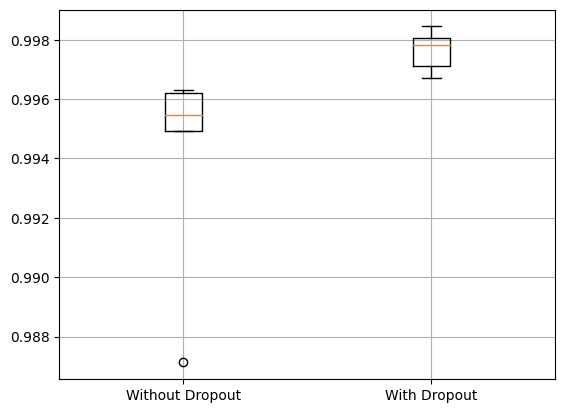

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pickle

# Load pickle file
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# print(np.unique(y_train))
# print(np.unique(y_test))
x_train = np.transpose(x_train, (0, 2, 3, 1))
x_test = np.transpose(x_test, (0, 2, 3, 1))


x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,43)
y_test=tf.keras.utils.to_categorical(y_test,43)

# 하이퍼 매개변수 설정
batch_siz=50
n_epoch=10
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(43,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])


In [ ]:
 def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        class_label , class_counts = np.unique(t, return_counts=True)        
        class_accuracy = np.zeros(np.max(class_label) + 1)  # 클래스 개수에 맞게 class_accuracy 배열 생성

        for i in range(len(class_accuracy)):
            class_accuracy[i] = np.sum((y == i) & (t == i)) / float(class_counts[i])

        return accuracy, class_accuracy